# Class exercise 12 - working with text

# steps

### Part 1
1. Get data from: "https://en.wikisource.org/wiki/Portal:State_of_the_Union_Speeches_by_United_States_Presidents"
2. Using BeatifullSoup get all the speeches from 1900-2022
3. Load all speech urls into a dictionary with year as key
4. Loop through dictionary and save content of each speech in [year].txt files

### Part 2
1. Install nltk: `pip install nltk`
2. From the data/gdp.csv file create a dataframe with year and GDP
3. From the data/US presidents.csv file create a dataframe with year, president and party
4. From the developed text files in part 1, create a dictionary with year:speech
5. Clean text by change all to lowercase and remove '\n'
6. Get words from texts (from nltk.tokenize import word_tokenize). Clean text by removing stop words (from nltk.corpus import stopwords) and all non-alphabetic characters (including , and .)
7. Use from nltk.stem import WordNetLemmatizer to lemmatize all texts

### Part 3
**[TextBlob](https://textblob.readthedocs.io/en/dev/quickstart.html)** returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information
1. Install both textblob for sentiment analysis and wordclouds (pip install textblob wordclouds)
2. Find the polarity and subjectivity of each text (Hint: `TextBlob(text).sentiment`)
3. Is there a correlation between negativity and recession years?
4. Create a word cloud for the cleaned up speeches of both Trump and Obama. What can be learned from the word clouds?

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import lxml
import re
import pandas as pd

In [2]:
#!mkdir data/speeches

In [68]:

# URL to the main Wikipedia page
main_url = "https://en.wikisource.org/wiki/Portal:State_of_the_Union_Speeches_by_United_States_Presidents"

page = requests.get(main_url).text
soup = BeautifulSoup(page, "lxml")

# Finds all speeches from 1900 to 2021:
soup = soup.find_all('li')

soup = soup[144:268]
speech_urls = []
year_list = []

# Loads all speech URls into list:
for li in soup:
    
    # Finds URL and appends to 'speech_urls' list
    url = "https://en.wikisource.org/" + li.a.get('href')
    speech_urls.append(url)
    
    # Finds text next to the second  tag, as this text contains the date infomation for the speech: 
    this_date = li.find_all('a')[1].next_sibling
    
    # We use regex to find the year from the date string:
    this_year = re.search(r"\b(19|20)\d{2}\b", this_date)
    
    # Year is appended to 'year_list'
    year_list.append(this_year.group(0))

In [88]:
sibling = soup[10].find_all('a')[1].next_sibling
print(sibling)
year = re.search(r'(19|20)\d{2}',sibling)
year

, (6 December 1910)


<re.Match object; span=(14, 18), match='1910'>

In [4]:
# Creates a dictionary so we can iterate 'year_list' and 'speech_urls' at the same time:
url_year_dict = dict(zip(year_list, speech_urls))

In [5]:
# Opens each URL, reads text and saves text:
for year, url in url_year_dict.items():
    page = requests.get(url).content
    soup = BeautifulSoup(page, "lxml")
    
    # We remove the first and the last tag to clean the data:

    text = soup.find_all('p')[1:-1]
    
    # Sets filename and increments year:
    filename = "./data/speeches/" + year + ".txt" 
    
    # Creates file:
    f = open(filename ,"w+")
    for line in text:
        # .getText() method is added to extract content from each 

        # tag, so the tag is not included:
        f.write(line.getText())

In [66]:
#List of US GDP yearly growth (for later use)

#list of year-on-year % change in US GDP (Gross Domestic Product: Economic growth)
df_csv = pd.read_csv('data/gdp.csv')
df_csv.rename(columns={'date': 'year', 'change-chained' : 'GDP'}, inplace=True)

gdp = df_csv.iloc[:, [0, 4]].copy()

gdp.sort_values(by=['year'], inplace=True)
print(df_csv.head())
print(gdp.head())

   year   GDP
0  1930  -6.4
1  1931 -12.9
2  1932  -1.3
3  1933  10.8
4  1934   8.9
5  1935  12.9
6  1936   5.1
7  1937  -3.3
8  1938   8.0
9  1939   8.8
    year  level-current  level-chained  change-current   GDP
0   1930           92.2          966.7           -16.0  -6.4
1   1931           77.4          904.8           -23.1 -12.9
2   1932           59.5          788.2            -4.0  -1.3
3   1933           57.2          778.3            16.9  10.8
4   1934           66.8          862.2            11.1   8.9
..   ...            ...            ...             ...   ...
81  2011        15517.9        15020.6             4.1   2.2
82  2012        16155.3        15354.6             3.3   1.7
83  2013        16691.5        15612.2             4.4   2.6
84  2014        17427.6        16013.3             4.0   2.9
85  2015        18120.7        16471.5             2.8   1.5

[86 rows x 5 columns]


In [7]:
df_csv.head()

,year,level-current,level-chained,change-current,GDP
0,1930,92.2,966.7,-16.0,-6.4
1,1931,77.4,904.8,-23.1,-12.9
2,1932,59.5,788.2,-4.0,-1.3
3,1933,57.2,778.3,16.9,10.8
4,1934,66.8,862.2,11.1,8.9


## Part 2

In [8]:
pip install nltk

In [9]:
import pandas as pd
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
pd.options.mode.chained_assignment = None
import nltk
from nltk.stem import WordNetLemmatizer

#create dataframe with year, president and party columns
df = pd.read_csv('data/US presidents.csv', delimiter=';')

#rename column for easier reading
df.rename(columns={'Years (after inauguration)': 'year'}, inplace=True)

#Make a series with the filenames:
path = 'data/speeches/'
files = pd.Series(sorted(os.listdir(path))).map(lambda x: x[:-4])

df
#files

,year,President,Party
0,1900,William McKinley,Republican
1,1901,Theodore Roosevelt,Republican
2,1902,Theodore Roosevelt,Republican
3,1903,Theodore Roosevelt,Republican
4,1904,Theodore Roosevelt,Republican
...,...,...,...
116,2017,Donald Trump,Republican
117,2018,Donald Trump,Republican
118,2019,Donald Trump,Republican
119,2020,Donald Trump,Republican


In [10]:
! mkdir data/pickled_data

mkdir: cannot create directory ‘data/pickled_data’: File exists


In [11]:
#method that returns dict with key: year (int) value: speech (str)
def get_text_dict():
    txtdict = {}

    for file in files:
        file_ = path + file + '.txt'
        f = open(file_, encoding='utf8', errors='ignore')
        filetxt = f.read()
        txtdict[int(file)] = filetxt

    return txtdict

text = get_text_dict()

In [12]:
#Add series to df with speeches from dict values
speech_list = list(text.values())
df['speech'] = pd.Series(speech_list)
df

,year,President,Party,speech
0,1900,William McKinley,Republican,To the Senate and House of Representatives:\nA...
1,1901,Theodore Roosevelt,Republican,To the Senate and House of Representatives:\nT...
2,1902,Theodore Roosevelt,Republican,To the Senate and House of Representatives:\nW...
3,1903,Theodore Roosevelt,Republican,To the Senate and House of Representatives:\nT...
4,1904,Theodore Roosevelt,Republican,To the Senate and House of Representatives:\nT...
...,...,...,...,...
116,2017,Donald Trump,Republican,"Mr. Speaker, Mr. Vice President, Members of Co..."
117,2018,Donald Trump,Republican,"Mr. Speaker, Mr. Vice President, Members of Co..."
118,2019,Donald Trump,Republican,"Madam Speaker, Mr. Vice President, Members of ..."
119,2020,Donald Trump,Republican,"Madam Speaker, Mr. Vice President, Members of ..."


In [13]:
def simple_clean(text):
    text = text.lower()
    text: str = re.sub("\n", "", text)
    return text

def clean_text(speech):
    tokens = word_tokenize(speech)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# First Clean-Up
first_clean = lambda x: simple_clean(x)

df['first_clean'] = df.speech.apply(first_clean)

first_clean_tokenized = lambda x: clean_text(x)

df['first_clean_tokenized'] = df.speech.apply(first_clean_tokenized)

#saving dataframe
df.to_pickle('data/data_first_clean.pkl')

# Second Clean-up

# Create a copy of dataframe for round 2:
df2 = df

def lemmatize(list):
    wordnet_lemmatizer = WordNetLemmatizer()
    wordlist = []
    for word in list:
        wordlist.append(wordnet_lemmatizer.lemmatize(word))
    return wordlist

df2['second_clean_lemmatized'] = df['first_clean_tokenized'].apply(lemmatize)
df2 = df2.drop(['first_clean', 'first_clean_tokenized'], axis=1)

#saving dataframe
df2.to_pickle('data/data_second_clean.pkl')


In [14]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Part 3 analysis and presentation

In [16]:
import pandas as pd
import numpy as np
from nltk import sent_tokenize,word_tokenize
from textblob import TextBlob
from nltk import FreqDist
import itertools
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction import text
from wordcloud import WordCloud

In [17]:
nltk.download('vader_lexicon') # Used by TextBlob
# VADER ( Valence Aware Dictionary for Emotional Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
df_first_clean = pd.read_pickle('data/data_first_clean.pkl')
df_second_clean = pd.read_pickle('data/data_second_clean.pkl')

#### Polarity and Subjectivity
Generally, a text message will be represented by bag of words. After assigning individual scores to all the words, final sentiment is calculated by some pooling operation like taking an average of all the sentiments.
Polarity is the output that lies between `[-1,1]`, where -1 refers to negative sentiment and +1 refers to positive sentiment. Subjectivity is the output that lies within `[0,1]` and refers to personal opinions and judgments 


In [19]:
#Sentiment analysis on Polarity and Subjectivity for all speeches using TextBlob:
def sentiment(text):
    try:
        # print(TextBlob(text).sentiment)
        return TextBlob(text).sentiment # returns both polarity and subjectivity
    except:
        return None
    
df_first_clean['Polarity'] = df_first_clean['first_clean'].apply(sentiment).apply(lambda x: x[0])
df_first_clean['Subjectivity'] = df_first_clean['first_clean'].apply(sentiment).apply(lambda x: x[1])

df_first_clean.to_pickle('data/data_first_clean_sentiment.pkl')

df_first_clean


,year,President,Party,speech,first_clean,first_clean_tokenized,Polarity,Subjectivity
0,1900,William McKinley,Republican,To the Senate and House of Representatives:\nA...,to the senate and house of representatives:at ...,"[senate, house, representatives, outgoing, old...",0.115256,0.404176
1,1901,Theodore Roosevelt,Republican,To the Senate and House of Representatives:\nT...,to the senate and house of representatives:the...,"[senate, house, representatives, congress, ass...",0.139217,0.471688
2,1902,Theodore Roosevelt,Republican,To the Senate and House of Representatives:\nW...,to the senate and house of representatives:we ...,"[senate, house, representatives, still, contin...",0.120273,0.497860
3,1903,Theodore Roosevelt,Republican,To the Senate and House of Representatives:\nT...,to the senate and house of representatives:the...,"[senate, house, representatives, country, cong...",0.119628,0.456306
4,1904,Theodore Roosevelt,Republican,To the Senate and House of Representatives:\nT...,to the senate and house of representatives:the...,"[senate, house, representatives, nation, conti...",0.137607,0.500679
...,...,...,...,...,...,...,...,...
116,2017,Donald Trump,Republican,"Mr. Speaker, Mr. Vice President, Members of Co...","mr. speaker, mr. vice president, members of co...","[mr, speaker, mr, vice, president, members, co...",0.146113,0.450257
117,2018,Donald Trump,Republican,"Mr. Speaker, Mr. Vice President, Members of Co...","mr. speaker, mr. vice president, members of co...","[mr, speaker, mr, vice, president, members, co...",0.113485,0.485158
118,2019,Donald Trump,Republican,"Madam Speaker, Mr. Vice President, Members of ...","madam speaker, mr. vice president, members of ...","[madam, speaker, mr, vice, president, members,...",0.114962,0.449762
119,2020,Donald Trump,Republican,"Madam Speaker, Mr. Vice President, Members of ...","madam speaker, mr. vice president, members of ...","[madam, speaker, mr, vice, president, members,...",0.137910,0.452048


In [20]:
#Selection of years of economic crisis or growth:
list_economic_crisis = [1930, 1931, 1932, 1986, 1987, 1988, 2008, 2009, 2010]
list_economic_growth = [1926, 1927, 1928, 1992, 1993, 1994, 2005, 2006, 2007]

In [21]:
# Main method for analysis
def method_sentiment(speech):
    #We remove '\n':
    speech = speech.replace('\n', '')
    
    #We split the speech into sentences to optimize for nltk.sentiment:
    list_sentences = speech.split(sep='. ')
    
    #Add all the polarity scores of the sentences to a list:
    scores = []
    
    sentimentIntensityAnalyzer = SentimentIntensityAnalyzer()
    
    for sentence in list_sentences:
        scores.append(sentimentIntensityAnalyzer.polarity_scores(sentence))
    
    #Sums and finds average polarity for each speech:
    list_all_posistive = []
    list_all_neutral = []
    list_all_negative = []
    list_all_compound = []
    
    for score in scores:
        for key, value in score.items():
            if key == 'pos':
                list_all_posistive.append(value)
            if key == 'neu':
                list_all_neutral.append(value)
            if key == 'neg':
                list_all_negative.append(value)
            if key == 'compound':
                list_all_compound.append(value)
                
    avg_posistive = round(sum(list_all_posistive) / len(list_all_posistive), 4)
    avg_neutral = round(sum(list_all_neutral) / len(list_all_neutral), 4)
    avg_negative = round(sum(list_all_negative) / len(list_all_negative), 4)
    avg_compound = round(sum(list_all_compound) / len(list_all_compound), 4)
     
    #Result is a dictionary of the same format as from the original 'SentimentIntensityAnalyzer..polarity_scores()' method:
    result = {'neg': avg_negative, 'neu': avg_neutral, 'pos': avg_posistive, 'compound': avg_compound}
    
    #Return result
    return result



In [22]:
#Simple sentences:
positive_sentence_1 = 'I love CPHBusiness and I think it is the best school'
negative_sentence_1 = 'I hate CPHBusienss and I think it is the worst school'


print('SIMPLE:')
print('Positive:')
print(method_sentiment(positive_sentence_1))
print('Negative:')
print(method_sentiment(negative_sentence_1))


#Complex sentences (from 2002 speech):
positive_sentence_2 = 'America and Afghanistan are now allies against terror. We will be partners in rebuilding that country. And this evening we welcome the distinguished interim leader of a liberated Afghanistan: Chairman Hamid Karzai. The last time we met in this chamber, the mothers and daughters of Afghanistan were captives in their own homes, forbidden from working or going to school. Today women are free, and are part of Afghanistans new government. And we welcome the new Minister of Womens Affairs, Doctor Sima Samar.'
negative_sentence_2 = 'What we have found in Afghanistan confirms that, far from ending there, our war against terror is only beginning. Most of the 19 men who hijacked planes on September the 11th were trained in Afghanistans camps, and so were tens of thousands of others.  Thousands of dangerous killers, schooled in the methods of murder, often supported by outlaw regimes, are now spread throughout the world like ticking time bombs, set to go off without warning. '

print('\nCOMPLEX:')
print('(Slightly) Positive:')
print(method_sentiment(positive_sentence_2))
print('Negative:')
print(method_sentiment(negative_sentence_2))


#Before and after 9/11:
speech_2001 = df_second_clean['speech'][100]
speech_2002 = df_second_clean['speech'][101]

print('\nBEFORE AND AFTER 9/11:')
print('Before (2001):')
print(method_sentiment(speech_2001))
print('After (2002):')
print(method_sentiment(speech_2002))


SIMPLE:
Positive:
{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.8555}
Negative:
{'neg': 0.527, 'neu': 0.473, 'pos': 0.0, 'compound': -0.8316}

COMPLEX:
(Slightly) Positive:
{'neg': 0.0707, 'neu': 0.823, 'pos': 0.1063, 'compound': 0.08}
Negative:
{'neg': 0.1437, 'neu': 0.5673, 'pos': 0.039, 'compound': -0.4032}

BEFORE AND AFTER 9/11:
Before (2001):
{'neg': 0.0508, 'neu': 0.7787, 'pos': 0.1705, 'compound': 0.2977}
After (2002):
{'neg': 0.1309, 'neu': 0.6953, 'pos': 0.1738, 'compound': 0.0734}


In [23]:
# Initializes dataframe and removes unused column (if exists):
df_sentiment = df_second_clean.copy()
if 'second_clean_lemmatized' in df_sentiment.columns:
    del df_sentiment['second_clean_lemmatized']
    
# Uses lists created above to select years of crisis and growth:
df_crisis = df_sentiment.loc[df_sentiment['year'].isin(list_economic_crisis), ['speech']]
df_growth = df_sentiment.loc[df_sentiment['year'].isin(list_economic_growth), ['speech']]


In [24]:
# Result A: We get one combined result for crisis and growth periods
# Combines all speeches from the selected years of crisis and growth:
crisis_speeches = ''.join(df_crisis.speech)
growth_speeches = ''.join(df_growth.speech)

# Uses main method to perform sentiment analysis:
dict_crisis_result = method_sentiment(crisis_speeches)
dict_growth_result = method_sentiment(growth_speeches)

# Print result (plot doesn't make sense here):
print('CRISIS YEARS:')
print(dict_crisis_result)
print('\nGROWTH YEARS:')
print(dict_growth_result)



CRISIS YEARS:
{'neg': 0.0715, 'neu': 0.7994, 'pos': 0.1291, 'compound': 0.1557}

GROWTH YEARS:
{'neg': 0.0648, 'neu': 0.8011, 'pos': 0.1341, 'compound': 0.1784}


In [25]:
# Adds result to main DataFrame:
df_sentiment['sentiment_crisis'] = df_crisis.speech.apply(method_sentiment)
df_sentiment['sentiment_growth'] = df_growth.speech.apply(method_sentiment)

# Removes 'speech' column (if exists):
if 'speech' in df_sentiment.columns:
    del df_sentiment['speech']

# Removes all years from DataFrame that is not part of the analysis:
df_sentiment = df_sentiment.dropna(subset=['sentiment_crisis', 'sentiment_growth'], thresh=1)

#Print result:
df_sentiment

,year,President,Party,sentiment_crisis,sentiment_growth
26,1926,Calvin Coolidge,Republican,NaN,"{'neg': 0.0567, 'neu': 0.8213, 'pos': 0.122, '..."
27,1927,Calvin Coolidge,Republican,NaN,"{'neg': 0.0519, 'neu': 0.8241, 'pos': 0.124, '..."
28,1928,Calvin Coolidge,Republican,NaN,"{'neg': 0.041, 'neu': 0.841, 'pos': 0.1179, 'c..."
30,1930,Herbert Hoover,Republican,"{'neg': 0.0586, 'neu': 0.8522, 'pos': 0.0892, ...",NaN
31,1931,Herbert Hoover,Republican,"{'neg': 0.0616, 'neu': 0.8209, 'pos': 0.1175, ...",NaN
32,1932,Herbert Hoover,Republican,"{'neg': 0.0763, 'neu': 0.8094, 'pos': 0.1143, ...",NaN
85,1986,Ronald Reagan,Republican,"{'neg': 0.0804, 'neu': 0.7426, 'pos': 0.177, '...",NaN
86,1987,Ronald Reagan,Republican,"{'neg': 0.0577, 'neu': 0.8056, 'pos': 0.1368, ...",NaN
87,1988,Ronald Reagan,Republican,"{'neg': 0.0569, 'neu': 0.796, 'pos': 0.147, 'c...",NaN
91,1992,George Bush,Republican,NaN,"{'neg': 0.0638, 'neu': 0.8072, 'pos': 0.1259, ..."



Text complexity (LIX)
Definition of LIX

Calculation:



where

    A is the number of words,
    B is the number of periods (defined by period or colon), and
    C is the number of long words (more than 6 letters).

Source: Wikipedia


Scores:

    Greater than 54: Very difficult
    Between 45-54 Difficult
    Between 35-44 Medium
    Between 25-34 Easy
    Less than 25: Very easy

## LIX analysis

In [26]:
# Copy main dataframe (first clean - we don't want lemmatization here!):
df_lix = df_first_clean.copy()
df_lix = df_lix.drop(columns = ['speech', 'first_clean_tokenized'])


# WORD COUNT:
# Method to calculate total words in each speach:
def word_count(speech):
    return sum(1 for word in speech.split(' '))

# Get total words in each speech and add result to DataFrame:
df_lix['word_count'] = df_lix.first_clean.apply(word_count)


# COUNT OF PERIODS:
# Method to calculate total number of periods (period or colon) in each speach:
def period_count(speech):
    result = speech.count('.') + speech.count(':')
    return result

# Get total number of periods in each speech and add result to DataFrame:
df_lix['period_count'] = df_lix.first_clean.apply(period_count)


# COUNT OF LONG WORDS:
# Method to long words (< 6 characters) in each speach:
def long_word_count(speech):
    count = 0
    for word in speech.split(' '):
        if len(word) > 6:
            count += 1
    return count

# Get total number of long words in each speech and add result to DataFrame:
df_lix['long_words_count'] = df_lix.first_clean.apply(long_word_count)


# CALCULATE LIX:
# Calculates LIX for each speech and adds result to DataFrame:
df_lix['lix'] = (df_lix.word_count/df_lix.period_count) + ((df_lix.long_words_count*100) / df_lix.word_count)



<AxesSubplot: xlabel='year'>

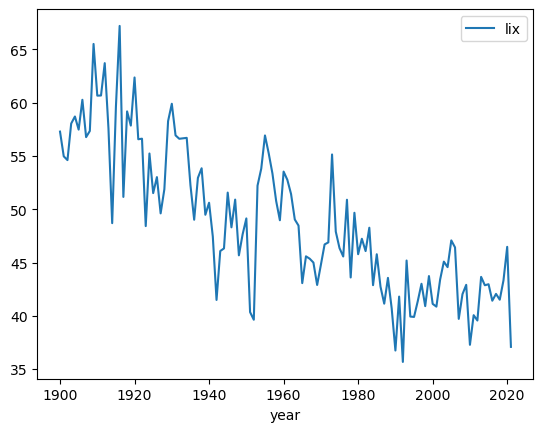

In [27]:
# Development in LIX over the years for all speeches:
df_lix.plot(x = 'year', y = 'lix')

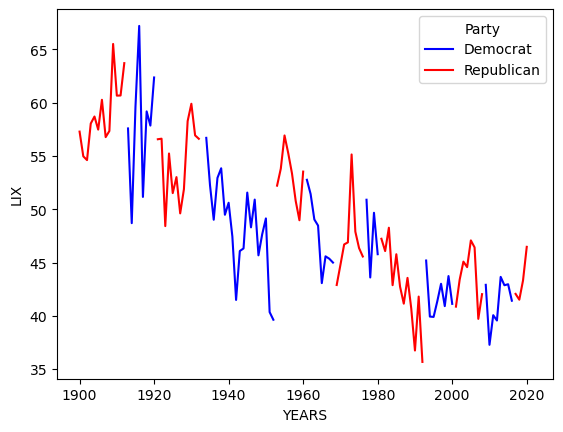

In [28]:
# Development in LIX showing difference between Democrats and Republicans:
df_lix_party = df_lix.copy()

df_lix_party = df_lix.pivot(index='year', columns='Party', values='lix')
df_lix_party.plot(color=['blue', 'red'])

plt.ylabel('LIX')
plt.xlabel('YEARS')
plt.show()

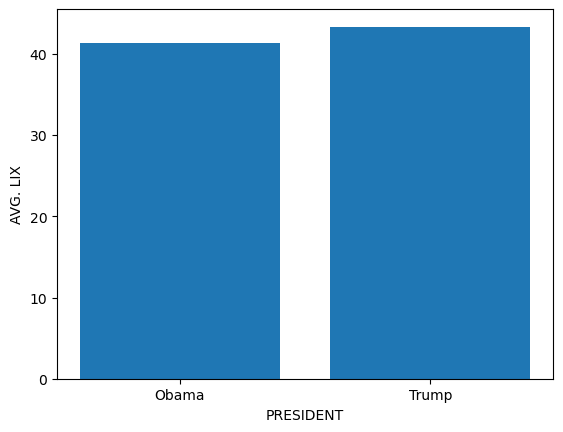

In [29]:
# Comparison of between speeches performed by Obama and Trump:
mask_obama = (df_lix['President'] == 'Barack Obama')
mask_trump = (df_lix['President'] == 'Donald Trump')

avg_lix_obama = df_lix[mask_obama]['lix'].mean()
avg_lix_trump = df_lix[mask_trump]['lix'].mean()

x = ["Obama", "Trump"]
y = [avg_lix_obama, avg_lix_trump]


plt.bar(x,y)
plt.ylabel('AVG. LIX')
plt.xlabel('PRESIDENT')
plt.show()


## Word frequency
Before lemmatization

In [30]:
#Masks to filter on democrats and republicans
mask_democrats = (df_first_clean['Party'] == 'Democrat')
mask_republicans = (df_first_clean['Party'] == 'Republican')

#DEMOCRATS:
#Filter dataframe on democrats:
df_first_clean_democrats = df_first_clean[mask_democrats]
#Takes 'first_clean_tokenized' column and converts to list:
tokenized_speeches_democrats = df_first_clean_democrats['first_clean_tokenized'].tolist()
#Combines list of lists into one list:
tokenized_speeches_democrats = list(itertools.chain.from_iterable(tokenized_speeches_democrats))

#Republicans:
#Filter dataframe on republicans:
df_first_clean_republicans = df_first_clean[mask_republicans]
#Takes 'first_clean_tokenized' column and converts to list:
tokenized_speeches_republicans = df_first_clean_republicans['first_clean_tokenized'].tolist()
#Combines list of lists into one list:
tokenized_speeches_republicans = list(itertools.chain.from_iterable(tokenized_speeches_republicans))



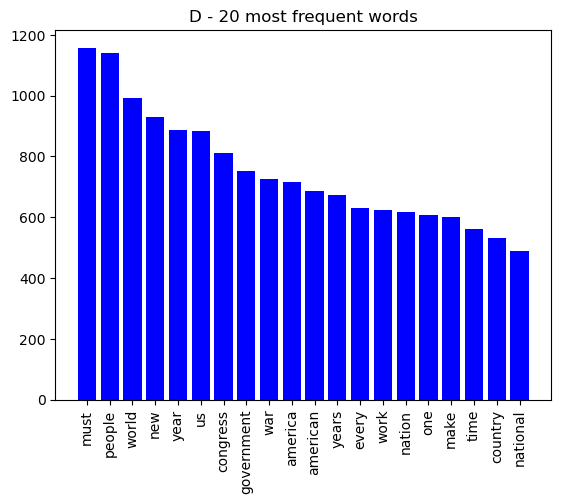

[('must', 1158),
 ('people', 1140),
 ('world', 992),
 ('new', 929),
 ('year', 887),
 ('us', 885),
 ('congress', 812),
 ('government', 753),
 ('war', 725),
 ('america', 716),
 ('american', 685),
 ('years', 673),
 ('every', 632),
 ('work', 624),
 ('nation', 616),
 ('one', 609),
 ('make', 600),
 ('time', 562),
 ('country', 533),
 ('national', 489)]

In [31]:
#Checks word freq in all democrat speeches:
freqDist_democrats = FreqDist(tokenized_speeches_democrats)

dem_to_dict = dict(freqDist_democrats.most_common(20))

    
plt.bar(*zip(*dem_to_dict.items()), color='blue')
plt.xticks(rotation=90)
plt.title('D - 20 most frequent words')

plt.show()

freqDist_democrats.most_common(20)

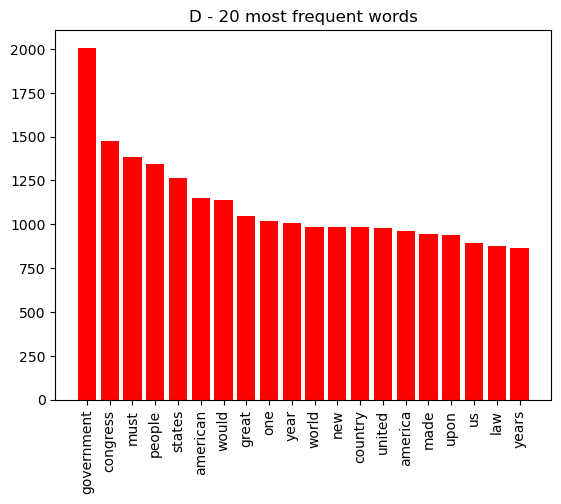

[('government', 2007),
 ('congress', 1477),
 ('must', 1381),
 ('people', 1341),
 ('states', 1262),
 ('american', 1150),
 ('would', 1140),
 ('great', 1045),
 ('one', 1016),
 ('year', 1008),
 ('world', 985),
 ('new', 984),
 ('country', 984),
 ('united', 981),
 ('america', 961),
 ('made', 946),
 ('upon', 936),
 ('us', 892),
 ('law', 876),
 ('years', 867)]

In [32]:
#Checks word freq in all republican speeches:
freqDist_republicans = FreqDist(tokenized_speeches_republicans)

rep_to_dict = dict(freqDist_republicans.most_common(20))

    
plt.bar(*zip(*rep_to_dict.items()), color='red')
plt.xticks(rotation=90)
plt.title('D - 20 most frequent words')

plt.show()

freqDist_republicans.most_common(20)

# After lemmatization


In [33]:
# Masks to filter on democrats and republicans
mask_democrats = (df_second_clean['Party'] == 'Democrat')
mask_republicans = (df_second_clean['Party'] == 'Republican')

#DEMOCRATS:
#Filter dataframe on democrats:
df_second_clean_democrats = df_second_clean[mask_democrats]
#Takes 'second_clean_lemmatized' column and converts to list:
lemmatized_speeches_democrats = df_second_clean_democrats['second_clean_lemmatized'].tolist()
#Combines list of lists into one list:
lemmatized_speeches_democrats = list(itertools.chain.from_iterable(lemmatized_speeches_democrats))

#Republicans:
#Filter dataframe on republicans:
df_second_clean_republicans = df_second_clean[mask_republicans]
#Takes 'second_clean_lemmatized' column and converts to list:
lemmatized_speeches_republicans = df_second_clean_republicans['second_clean_lemmatized'].tolist()
#Combines list of lists into one list:
lemmatized_speeches_republicans = list(itertools.chain.from_iterable(lemmatized_speeches_republicans))

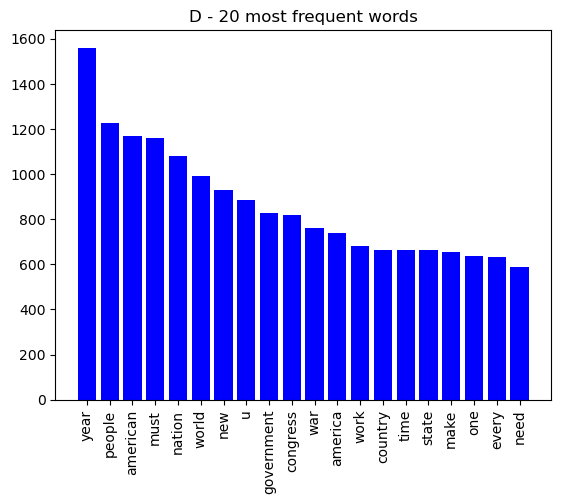

[('must', 1158),
 ('people', 1140),
 ('world', 992),
 ('new', 929),
 ('year', 887),
 ('us', 885),
 ('congress', 812),
 ('government', 753),
 ('war', 725),
 ('america', 716),
 ('american', 685),
 ('years', 673),
 ('every', 632),
 ('work', 624),
 ('nation', 616),
 ('one', 609),
 ('make', 600),
 ('time', 562),
 ('country', 533),
 ('national', 489)]

In [34]:
#Checks word freq in all democrat speeches:
freqDistr_democrats = FreqDist(lemmatized_speeches_democrats)

dems_to_dict = dict(freqDistr_democrats.most_common(20))

plt.bar(*zip(*dems_to_dict.items()), color='blue')
plt.xticks(rotation=90)
plt.title('D - 20 most frequent words')

plt.show()

freqDist_democrats.most_common(20)


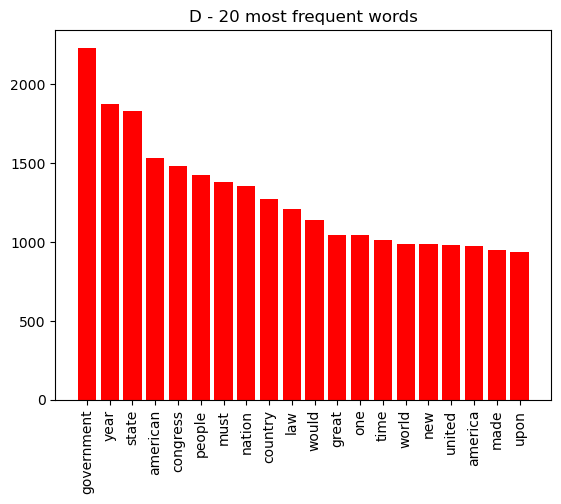

[('government', 2007),
 ('congress', 1477),
 ('must', 1381),
 ('people', 1341),
 ('states', 1262),
 ('american', 1150),
 ('would', 1140),
 ('great', 1045),
 ('one', 1016),
 ('year', 1008),
 ('world', 985),
 ('new', 984),
 ('country', 984),
 ('united', 981),
 ('america', 961),
 ('made', 946),
 ('upon', 936),
 ('us', 892),
 ('law', 876),
 ('years', 867)]

In [35]:
#Checks word freq in all republican speeches:
freqDistr_republicans = FreqDist(lemmatized_speeches_republicans)

reps_to_dict = dict(freqDistr_republicans.most_common(20))

plt.bar(*zip(*reps_to_dict.items()), color='red')
plt.xticks(rotation=90)
plt.title('D - 20 most frequent words')

plt.show()

freqDist_republicans.most_common(20)


# Part 4 Topic analysis

In [36]:
pip install torch gensim

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import pickle
import torch
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
from gensim import matutils, models
import scipy.sparse
from collections import Counter
from nltk import word_tokenize, pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

2022-11-10 10:34:49.592779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 10:34:51.824101: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 10:34:53.063824: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-10 10:34:53.064012: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [39]:
# Topic modelling using LDA
# https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

#We select speeches from 5 historically significant years from corpus
data = pd.read_pickle('data/data_first_clean.pkl')
data.drop(['President', 'Party','speech', 'first_clean_tokenized'], axis=1, inplace = True)
#rename column for clarity
data = data.rename({'first_clean' : 'speech'}, axis=1)

years = [1946, 1976, 1990, 2002, 2009]

data = data.loc[data['year'].isin(years)]
#data = data.reset_index(drop=True)

data['year'] = data['year'].apply(str)
#test 1
data = data.set_index('year')
data.head()

,speech
year,
1946,a quarter century ago the congress decided tha...
1976,"mr. speaker, mr. vice president, members of th..."
1990,"tonight, i come not to speak about the ""state ..."
2002,we last met in an hour of shock and suffering....
2009,"madame speaker, mr. vice president, members of..."


In [40]:
#Check a sample to see if more cleaning is needed

def clean_for_tdm(text):
    '''Remove forward slash, punctuation and numbers'''
    text = text.replace("\\", "")
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text   

#clean column speech
data['speech'] = data.speech.map(lambda x : clean_for_tdm(x))
data.head()

,speech
year,
1946,a quarter century ago the congress decided tha...
1976,mr speaker mr vice president members of the c...
1990,tonight i come not to speak about the state of...
2002,we last met in an hour of shock and suffering ...
2009,madame speaker mr vice president members of co...


In [41]:
# Create DTM (document term matrix)
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.speech)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data.index
data_dtm

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,abess,abide,abilities,ability,able,ably,aboutand,abovementioned,abreast,...,young,younger,youngest,youngi,youngmy,youre,youve,zero,zone,zones
year,,,,,,,,,,,,,,,,,,,,,
1946,1,0,1,1,3,4,1,0,1,1,...,1,0,0,0,0,0,0,0,2,1
1976,0,0,0,1,2,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
1990,0,0,0,0,0,0,0,1,0,0,...,2,0,0,0,0,2,0,0,0,1
2002,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2009,0,1,0,0,3,4,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0


In [42]:
data_dtm.to_pickle('data/dtm.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [43]:
data_dtm = data_dtm.transpose()
data_dtm.head()

year,1946,1976,1990,2002,2009
aaa,1,0,0,0,0
abess,0,0,0,0,1
abide,1,0,0,0,0
abilities,1,1,0,0,0
ability,3,2,0,0,3


In [44]:
#Find the 20 most used words in each speech
top_words = {}

for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(20)
    top_words[c]= list(zip(top.index, top.values))

top_words

{'1946': [('dollars', 197),
  ('war', 177),
  ('year', 166),
  ('million', 131),
  ('fiscal', 117),
  ('government', 112),
  ('expenditures', 112),
  ('program', 93),
  ('united', 89),
  ('billion', 79),
  ('federal', 68),
  ('congress', 67),
  ('states', 66),
  ('legislation', 60),
  ('national', 58),
  ('nations', 52),
  ('world', 51),
  ('economic', 51),
  ('estimated', 51),
  ('business', 50)],
 '1976': [('federal', 34),
  ('year', 25),
  ('america', 17),
  ('government', 17),
  ('people', 16),
  ('new', 16),
  ('programs', 15),
  ('budget', 14),
  ('congress', 14),
  ('economy', 13),
  ('american', 13),
  ('americans', 13),
  ('help', 12),
  ('states', 12),
  ('world', 12),
  ('local', 12),
  ('tax', 12),
  ('state', 11),
  ('future', 11),
  ('growth', 10)],
 '1990': [('american', 20),
  ('america', 19),
  ('world', 19),
  ('new', 17),
  ('year', 14),
  ('time', 14),
  ('tonight', 12),
  ('future', 11),
  ('need', 10),
  ('idea', 10),
  ('ago', 10),
  ('today', 9),
  ('hope', 9),


In [45]:
'''Print the 15 most used words in each speech, check if some should be added to stopword list,
if they are irrelevant for the topic analysis'''
for year, t_words in top_words.items():
    print(year)
    print(', '.join([word for word, count in t_words[0:14]]))
    print('')

1946
dollars, war, year, million, fiscal, government, expenditures, program, united, billion, federal, congress, states, legislation

1976
federal, year, america, government, people, new, programs, budget, congress, economy, american, americans, help, states

1990
american, america, world, new, year, time, tonight, future, need, idea, ago, today, hope, let

2002
america, security, world, american, terror, good, new, weapons, people, jobs, war, freedom, country, terrorists

2009
american, know, economy, plan, new, health, people, care, america, years, time, education, energy, budget



In [46]:
# make list of top 20 words in each of the 5 speeches, from top_words dict
words = []
for year in data_dtm.columns:
    top = [word for (word, count) in top_words[year]]
    for t in top:
        words.append(t)
        
words

['dollars',
 'war',
 'year',
 'million',
 'fiscal',
 'government',
 'expenditures',
 'program',
 'united',
 'billion',
 'federal',
 'congress',
 'states',
 'legislation',
 'national',
 'nations',
 'world',
 'economic',
 'estimated',
 'business',
 'federal',
 'year',
 'america',
 'government',
 'people',
 'new',
 'programs',
 'budget',
 'congress',
 'economy',
 'american',
 'americans',
 'help',
 'states',
 'world',
 'local',
 'tax',
 'state',
 'future',
 'growth',
 'american',
 'america',
 'world',
 'new',
 'year',
 'time',
 'tonight',
 'future',
 'need',
 'idea',
 'ago',
 'today',
 'hope',
 'let',
 'kids',
 'people',
 'capital',
 'state',
 'change',
 'budget',
 'america',
 'security',
 'world',
 'american',
 'terror',
 'good',
 'new',
 'weapons',
 'people',
 'jobs',
 'war',
 'freedom',
 'country',
 'terrorists',
 'afghanistan',
 'nation',
 'terrorist',
 'states',
 'congress',
 'applause',
 'american',
 'know',
 'economy',
 'plan',
 'new',
 'health',
 'people',
 'care',
 'america',
 'y

In [47]:
'''looking at the data, we decide that the most common words are irrelevant if they appear in more than 2 speeches
(words are likely generic to SOTU speeches and not relevant as topics in individual speeches )'''
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['world',
 'america',
 'people',
 'new',
 'american',
 'year',
 'congress',
 'states',
 'budget']

In [48]:
#update stop word list with the words found above, union is used to avoid duplicates
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [49]:

# Prepare for analysis and first run

#DTM is upated with the new stopwords

cv_stop = CountVectorizer(stop_words=stop_words)
data_cv = cv_stop.fit_transform(data.speech)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv_stop.get_feature_names())
data_stop.index = data.index

#data_stop.to_pickle('pickled_data/dtm_stop.pkl')

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
tdm = data_stop.T
tdm.head()

year,1946,1976,1990,2002,2009
aaa,1,0,0,0,0
abess,0,0,0,0,1
abide,1,0,0,0,0
abilities,1,1,0,0,0
ability,3,2,0,0,3


In [51]:
#change dtm df, first to sparse matrix and then to gensim corpus

sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# gensim requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv_stop.vocabulary_.items())

# corpus = TDM and id2word = dict {location : term}
'''LDA for 2 topics and 10 passes'''
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

'''LDA for 3 topics and 10 passes'''
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

'''LDA for 4 topics and 10 passes'''
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

# function that selects nouns only and return those as a string, details see: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

def nouns(text):
    '''tokenize a string and return only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

data_clean = pd.read_pickle('data/dtm.pkl')
data_clean.T

data_nouns = pd.DataFrame(data.speech.apply(nouns))
data_nouns

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.speech)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

'''LDA for 2 topics, 10 passes and nouns only'''
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(0,
  '0.008*"time" + 0.008*"economy" + 0.007*"health" + 0.007*"americans" + 0.006*"jobs" + 0.006*"care" + 0.006*"years" + 0.006*"government" + 0.005*"energy" + 0.005*"tax"'),
 (1,
  '0.023*"dollars" + 0.022*"war" + 0.013*"government" + 0.011*"expenditures" + 0.011*"program" + 0.007*"legislation" + 0.007*"nations" + 0.006*"time" + 0.006*"production" + 0.006*"business"')]

In [52]:
#3 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"security" + 0.008*"terror" + 0.007*"weapons" + 0.006*"war" + 0.006*"jobs" + 0.006*"nation" + 0.006*"country" + 0.006*"freedom" + 0.006*"terrorists" + 0.005*"time"'),
 (1,
  '0.009*"economy" + 0.008*"time" + 0.008*"health" + 0.007*"care" + 0.007*"years" + 0.007*"government" + 0.007*"americans" + 0.006*"jobs" + 0.006*"energy" + 0.006*"future"'),
 (2,
  '0.026*"dollars" + 0.023*"war" + 0.015*"government" + 0.012*"expenditures" + 0.012*"program" + 0.008*"legislation" + 0.007*"nations" + 0.007*"production" + 0.007*"business" + 0.006*"time"')]

In [53]:
#4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()


[(0,
  '0.001*"dollars" + 0.001*"war" + 0.001*"government" + 0.001*"program" + 0.001*"expenditures" + 0.001*"time" + 0.001*"country" + 0.001*"economy" + 0.001*"production" + 0.001*"legislation"'),
 (1,
  '0.027*"dollars" + 0.024*"war" + 0.015*"government" + 0.013*"expenditures" + 0.013*"program" + 0.008*"legislation" + 0.007*"nations" + 0.007*"business" + 0.007*"production" + 0.006*"time"'),
 (2,
  '0.009*"economy" + 0.009*"time" + 0.008*"health" + 0.008*"care" + 0.007*"years" + 0.007*"government" + 0.007*"americans" + 0.006*"future" + 0.006*"jobs" + 0.006*"energy"'),
 (3,
  '0.012*"security" + 0.009*"terror" + 0.008*"weapons" + 0.007*"war" + 0.007*"jobs" + 0.006*"country" + 0.006*"freedom" + 0.006*"nation" + 0.006*"terrorists" + 0.005*"time"')]

In [54]:
# function that returns nouns and adjectives from a text string
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

data_nouns_adj = pd.DataFrame(data.speech.apply(nouns_adj))
data_nouns_adj.speech[1]



'mr speaker mr vice president members congress guestsas bicentennial america youngest nations recorded history forefathers shores men women planet better life familiesin mans long upward march savagery years christian calendar years jewish reckoningthere many deep valleys many bright peaksone peak highest ranges human history example shines forth people abundance share good life freedom union promise justice opportunity citizen union united states americawe paradise earth perfection minute yearswe many roots many branches americans generations deeds other homeland refuge shores unison i proud america i proud americanlife little better children i i life father mother i better children hands brains voice vote america exists conditions people ideas practical reality best times much translation best intentions recent past sound most history great things ageold problems overconfident abilities policeman indulgent parent homewe thought country massive national programs programs things rush g

In [55]:
# Recreate a document-term matrix with nouns AND adjectives

cvna = CountVectorizer(stop_words=stop_words)
data_cvna = cvna.fit_transform(data_nouns_adj.speech)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,abilities,ability,able,aboutand,abovementioned,abroad,absence,absorption,abundance,...,york,young,younger,youngest,youngi,youngmy,youre,youve,zone,zones
year,,,,,,,,,,,,,,,,,,,,,
1946,1,1,3,4,0,1,1,0,1,1,...,1,1,0,0,0,0,0,0,1,1
1976,0,1,2,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,0,0,0
1990,0,0,0,0,1,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
2002,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,0
2009,0,0,3,4,0,0,0,1,0,0,...,0,2,0,0,0,0,0,1,0,0


In [56]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

#as above, 2 topics and 10 passes
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.015*"dollars" + 0.014*"war" + 0.009*"government" + 0.009*"fiscal" + 0.007*"united" + 0.007*"program" + 0.007*"expenditures" + 0.005*"federal" + 0.005*"time" + 0.005*"national"'),
 (1,
  '0.007*"federal" + 0.007*"economy" + 0.006*"health" + 0.005*"americans" + 0.005*"care" + 0.005*"government" + 0.005*"energy" + 0.005*"jobs" + 0.005*"years" + 0.005*"tax"')]

In [57]:
# 3 topics, 10 passes
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.006*"time" + 0.005*"future" + 0.005*"idea" + 0.004*"today" + 0.004*"tonight" + 0.004*"kids" + 0.004*"state" + 0.004*"free" + 0.004*"capital" + 0.004*"change"'),
 (1,
  '0.008*"economy" + 0.008*"plan" + 0.007*"health" + 0.007*"care" + 0.006*"years" + 0.005*"time" + 0.005*"energy" + 0.005*"education" + 0.005*"jobs" + 0.004*"country"'),
 (2,
  '0.015*"dollars" + 0.015*"war" + 0.010*"government" + 0.009*"fiscal" + 0.008*"federal" + 0.008*"united" + 0.007*"program" + 0.007*"expenditures" + 0.005*"legislation" + 0.005*"national"')]

In [58]:
#4 topics, 10 passes
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.001*"war" + 0.001*"dollars" + 0.000*"government" + 0.000*"expenditures" + 0.000*"federal" + 0.000*"program" + 0.000*"united" + 0.000*"fiscal" + 0.000*"legislation" + 0.000*"nations"'),
 (1,
  '0.001*"dollars" + 0.001*"war" + 0.001*"government" + 0.001*"united" + 0.001*"federal" + 0.001*"time" + 0.001*"program" + 0.000*"fiscal" + 0.000*"expenditures" + 0.000*"economy"'),
 (2,
  '0.016*"dollars" + 0.014*"war" + 0.010*"government" + 0.009*"fiscal" + 0.008*"program" + 0.008*"united" + 0.007*"expenditures" + 0.006*"federal" + 0.006*"time" + 0.005*"national"'),
 (3,
  '0.009*"federal" + 0.007*"security" + 0.006*"government" + 0.006*"jobs" + 0.006*"americans" + 0.005*"tax" + 0.005*"good" + 0.005*"war" + 0.004*"economy" + 0.004*"programs"')]

In [59]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.009*"federal" + 0.009*"economy" + 0.007*"health" + 0.006*"care" + 0.006*"americans" + 0.006*"government" + 0.006*"energy" + 0.006*"years" + 0.005*"plan" + 0.005*"tax"'),
 (1,
  '0.020*"dollars" + 0.018*"war" + 0.012*"fiscal" + 0.011*"government" + 0.009*"expenditures" + 0.009*"program" + 0.009*"united" + 0.007*"federal" + 0.006*"legislation" + 0.006*"national"'),
 (2,
  '0.007*"time" + 0.006*"future" + 0.005*"idea" + 0.005*"today" + 0.005*"tonight" + 0.005*"kids" + 0.004*"change" + 0.004*"free" + 0.004*"state" + 0.004*"capital"'),
 (3,
  '0.009*"security" + 0.007*"terror" + 0.006*"good" + 0.006*"weapons" + 0.005*"jobs" + 0.005*"war" + 0.005*"freedom" + 0.005*"terrorists" + 0.005*"country" + 0.005*"nation"')]

In [60]:
# which topics of the 4 lists found, are in which speech (year)
corpus_transformed = ldana[corpusna]
for a in corpus_transformed:
    print(a)
print(data_dtmna.index)
#list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 0.99991506)]
[(0, 0.9995162)]
[(2, 0.99928427)]
[(3, 0.9993681)]
[(0, 0.9995275)]
Index(['1946', '1976', '1990', '2002', '2009'], dtype='object', name='year')


In [61]:
data_st = pd.read_pickle('data/data_first_clean.pkl')
data_st.drop(['President', 'Party','speech', 'first_clean_tokenized'], axis=1, inplace = True)
data_st = data_st.rename({'first_clean' : 'speech'}, axis=1)
#Significant years: 1946, end of ww2, 1976 end of Vietnam war, 1990 end of cold war, 2002 9/11, 2009 glob finance crisis
years = [1946, 1976, 1990, 2002, 2009]

data_st = data_st.loc[data_st['year'].isin(years)]
data_st = data_st.reset_index(drop=True)

data_st['year'] = data_st.year.astype('str')

data_st.head()

,year,speech
0,1946,a quarter century ago the congress decided tha...
1,1976,"mr. speaker, mr. vice president, members of th..."
2,1990,"tonight, i come not to speak about the ""state ..."
3,2002,we last met in an hour of shock and suffering....
4,2009,"madame speaker, mr. vice president, members of..."


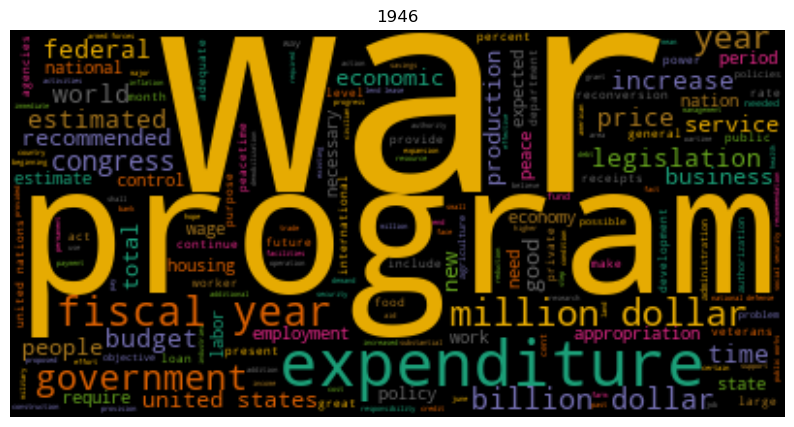

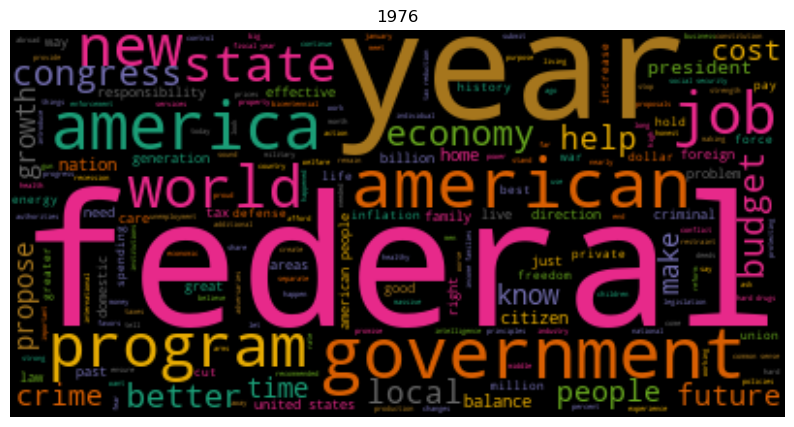

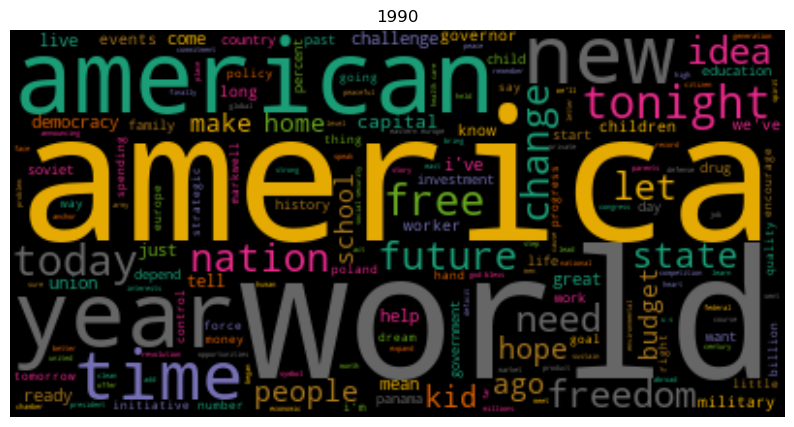

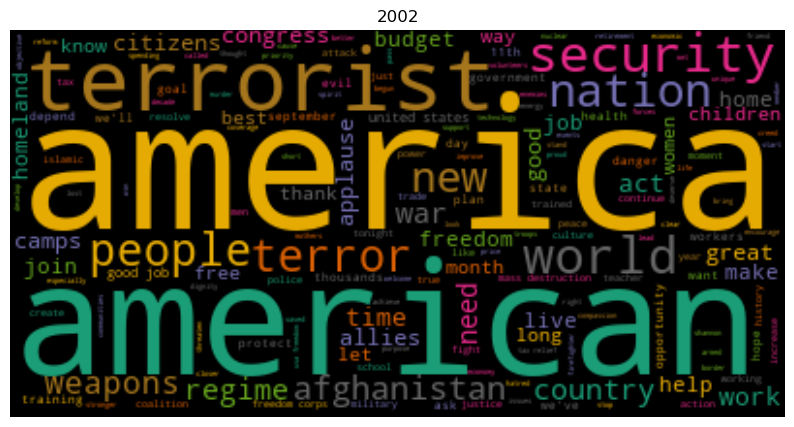

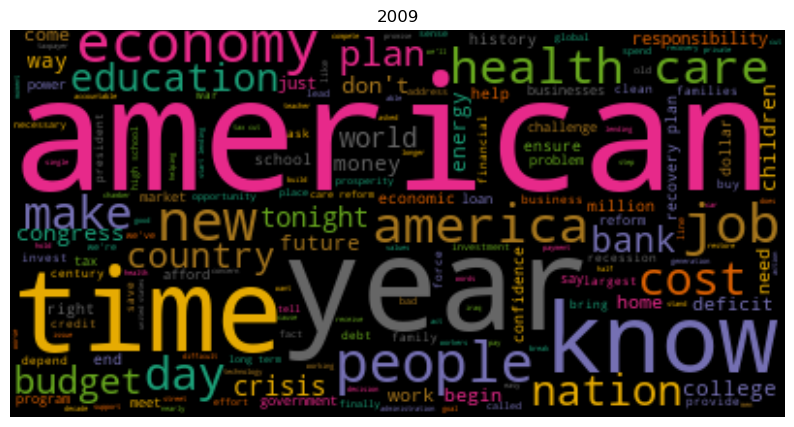

In [62]:
#make dict for plotting and alterative analysis below
speech_dict = dict(zip(data_st.year, data_st.speech))

#make wordcloud for each of the 5 speeches
stop_words = text.ENGLISH_STOP_WORDS

wc = WordCloud(stopwords=stop_words, background_color="black", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [10, 6]


for key, value in speech_dict.items():
    wc.generate(value)
    
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(key)    
    plt.show()

In [63]:
# As an experiment, we try the prelearned model from: https://huggingface.co/MoritzLaurer/policy-distilbert-7d on the same 5 years
def ml_policy(text):
    model_name = "MoritzLaurer/policy-distilbert-7d"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    input = tokenizer(text, truncation=True, return_tensors="pt")

    output = model(input["input_ids"])
    prediction = torch.softmax(output["logits"][0], -1).tolist()

    label_names = ["external relations", "freedom and democracy",
               "political system", "economy", "welfare and quality of life",
               "fabric of society", "social groups"]
    prediction = {name: round(float(pred) * 100, 1) for pred, name in
              zip(prediction, label_names)}
    return prediction

In [64]:
for x, y in speech_dict.items():
    print('Year: ', x)
    print(ml_policy(y))

Year:  1946
{'external relations': 0.2, 'freedom and democracy': 0.0, 'political system': 99.7, 'economy': 0.0, 'welfare and quality of life': 0.0, 'fabric of society': 0.0, 'social groups': 0.0}
Year:  1976
{'external relations': 0.0, 'freedom and democracy': 0.0, 'political system': 0.0, 'economy': 0.0, 'welfare and quality of life': 0.0, 'fabric of society': 100.0, 'social groups': 0.0}
Year:  1990
{'external relations': 100.0, 'freedom and democracy': 0.0, 'political system': 0.0, 'economy': 0.0, 'welfare and quality of life': 0.0, 'fabric of society': 0.0, 'social groups': 0.0}
Year:  2002
{'external relations': 100.0, 'freedom and democracy': 0.0, 'political system': 0.0, 'economy': 0.0, 'welfare and quality of life': 0.0, 'fabric of society': 0.0, 'social groups': 0.0}
Year:  2009
{'external relations': 0.0, 'freedom and democracy': 0.0, 'political system': 0.0, 'economy': 99.9, 'welfare and quality of life': 0.0, 'fabric of society': 0.1, 'social groups': 0.0}
